In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [3]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

dew  humidity  pressure  temperature     timestamp  volt
1728123923  25.74     82.68   1010.20        28.99  1.728124e+09  4.06
1728123983  25.73     82.75   1010.24        28.96  1.728124e+09  4.06
1728124043  25.73     82.74   1010.22        28.96  1.728124e+09  4.09
1728124103  25.75     82.99   1010.19        28.93  1.728124e+09  4.07
1728124162  25.69     82.96   1010.20        28.88  1.728124e+09  4.06
1728124224  25.72     83.15   1010.19        28.87  1.728124e+09  4.05
1728124283  25.66     83.27   1010.20        28.78  1.728124e+09  4.10
1728124343  25.66     83.45   1010.17        28.74  1.728124e+09  4.07
1728124403  25.72     83.73   1010.22        28.75  1.728124e+09  4.06
1728124463  25.65     83.44   1010.23        28.74  1.728124e+09  4.06

In [4]:
cuacaT.describe()

dew       humidity       pressure    temperature  \
count  417277.000000  417278.000000  417278.000000  417278.000000   
mean       25.015249      85.665978    1011.434465      27.826356   
std         1.508281      11.142084       2.788585       3.276500   
min        17.670000       0.000000       0.000000       0.020000   
25%        24.150000      76.870000    1010.200000      25.410000   
50%        25.100000      90.060000    1011.480000      26.940000   
75%        26.060000      94.740000    1012.770000      30.300000   
max        29.700000      99.580000    1016.530000      41.120000   

          timestamp           volt  
count  4.172780e+05  417278.000000  
mean   1.715275e+09       4.091055  
std    7.906862e+06       0.030949  
min    0.000000e+00       0.000000  
25%    1.708750e+09       4.070000  
50%    1.715374e+09       4.090000  
75%    1.721710e+09       4.120000  
max    1.728124e+09       4.170000

In [5]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt
1728123923  25.74     82.68   1010.20        28.99  1728123923  4.06
1728123983  25.73     82.75   1010.24        28.96  1728123983  4.06
1728124043  25.73     82.74   1010.22        28.96  1728124043  4.09
1728124103  25.75     82.99   1010.19        28.93  1728124103  4.07
1728124162  25.69     82.96   1010.20        28.88  1728124162  4.06
1728124224  25.72     83.15   1010.19        28.87  1728124224  4.05
1728124283  25.66     83.27   1010.20        28.78  1728124283  4.10
1728124343  25.66     83.45   1010.17        28.74  1728124343  4.07
1728124403  25.72     83.73   1010.22        28.75  1728124403  4.06
1728124463  25.65     83.44   1010.23        28.74  1728124463  4.06

In [6]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

# Mengubah format waktu menjadi '%Y-%m-%d %H:%M:%S' dalam WIB
cuacaT['timestamp'] = cuacaT['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Menampilkan 10 data terakhir
cuacaT.tail(10)

dew  humidity  pressure  temperature            timestamp  volt
1728123923  25.74     82.68   1010.20        28.99  2024-10-05 17:25:23  4.06
1728123983  25.73     82.75   1010.24        28.96  2024-10-05 17:26:23  4.06
1728124043  25.73     82.74   1010.22        28.96  2024-10-05 17:27:23  4.09
1728124103  25.75     82.99   1010.19        28.93  2024-10-05 17:28:23  4.07
1728124162  25.69     82.96   1010.20        28.88  2024-10-05 17:29:22  4.06
1728124224  25.72     83.15   1010.19        28.87  2024-10-05 17:30:24  4.05
1728124283  25.66     83.27   1010.20        28.78  2024-10-05 17:31:23  4.10
1728124343  25.66     83.45   1010.17        28.74  2024-10-05 17:32:23  4.07
1728124403  25.72     83.73   1010.22        28.75  2024-10-05 17:33:23  4.06
1728124463  25.65     83.44   1010.23        28.74  2024-10-05 17:34:23  4.06

In [7]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [8]:
datacuaca = (lambda: _deepnote_execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
datacuaca

dew  humidity  pressure  temperature           timestamp  volt
0       22.62     89.33   1011.29        24.49 1970-01-01 07:00:00  4.06
1       23.29     89.28   1010.72        25.18 2023-12-11 19:13:51  4.08
2       23.29     89.38   1010.75        25.16 2023-12-11 19:14:51  4.08
3       23.31     89.58   1010.76        25.14 2023-12-11 19:15:51  4.08
4       23.35     89.86   1010.82        25.13 2023-12-11 19:16:51  4.08
...       ...       ...       ...          ...                 ...   ...
417273  25.72     83.15   1010.19        28.87 2024-10-05 17:30:24  4.05
417274  25.66     83.27   1010.20        28.78 2024-10-05 17:31:23  4.10
417275  25.66     83.45   1010.17        28.74 2024-10-05 17:32:23  4.07
417276  25.72     83.73   1010.22        28.75 2024-10-05 17:33:23  4.06
417277  25.65     83.44   1010.23        28.74 2024-10-05 17:34:23  4.06

[417278 rows x 6 columns]

In [9]:
(lambda: DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [10]:
datacuaca

dew  humidity  pressure  temperature           timestamp  volt
0       22.62     89.33   1011.29        24.49 1970-01-01 07:00:00  4.06
1       23.29     89.28   1010.72        25.18 2023-12-11 19:13:51  4.08
2       23.29     89.38   1010.75        25.16 2023-12-11 19:14:51  4.08
3       23.31     89.58   1010.76        25.14 2023-12-11 19:15:51  4.08
4       23.35     89.86   1010.82        25.13 2023-12-11 19:16:51  4.08
...       ...       ...       ...          ...                 ...   ...
417273  25.72     83.15   1010.19        28.87 2024-10-05 17:30:24  4.05
417274  25.66     83.27   1010.20        28.78 2024-10-05 17:31:23  4.10
417275  25.66     83.45   1010.17        28.74 2024-10-05 17:32:23  4.07
417276  25.72     83.73   1010.22        28.75 2024-10-05 17:33:23  4.06
417277  25.65     83.44   1010.23        28.74 2024-10-05 17:34:23  4.06

[417278 rows x 6 columns]

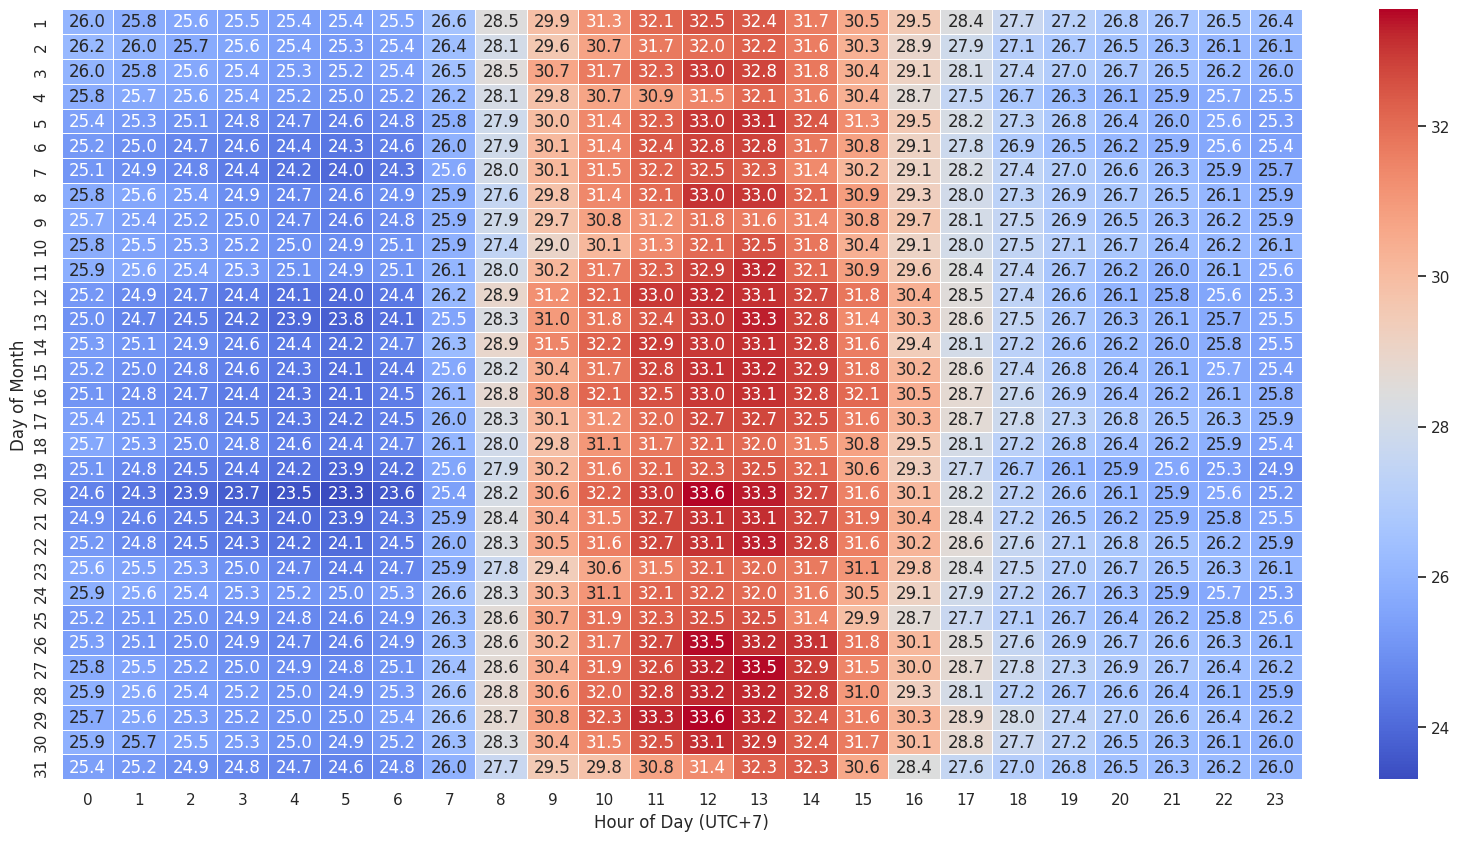

In [11]:
# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['hour'] = datacuaca['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()


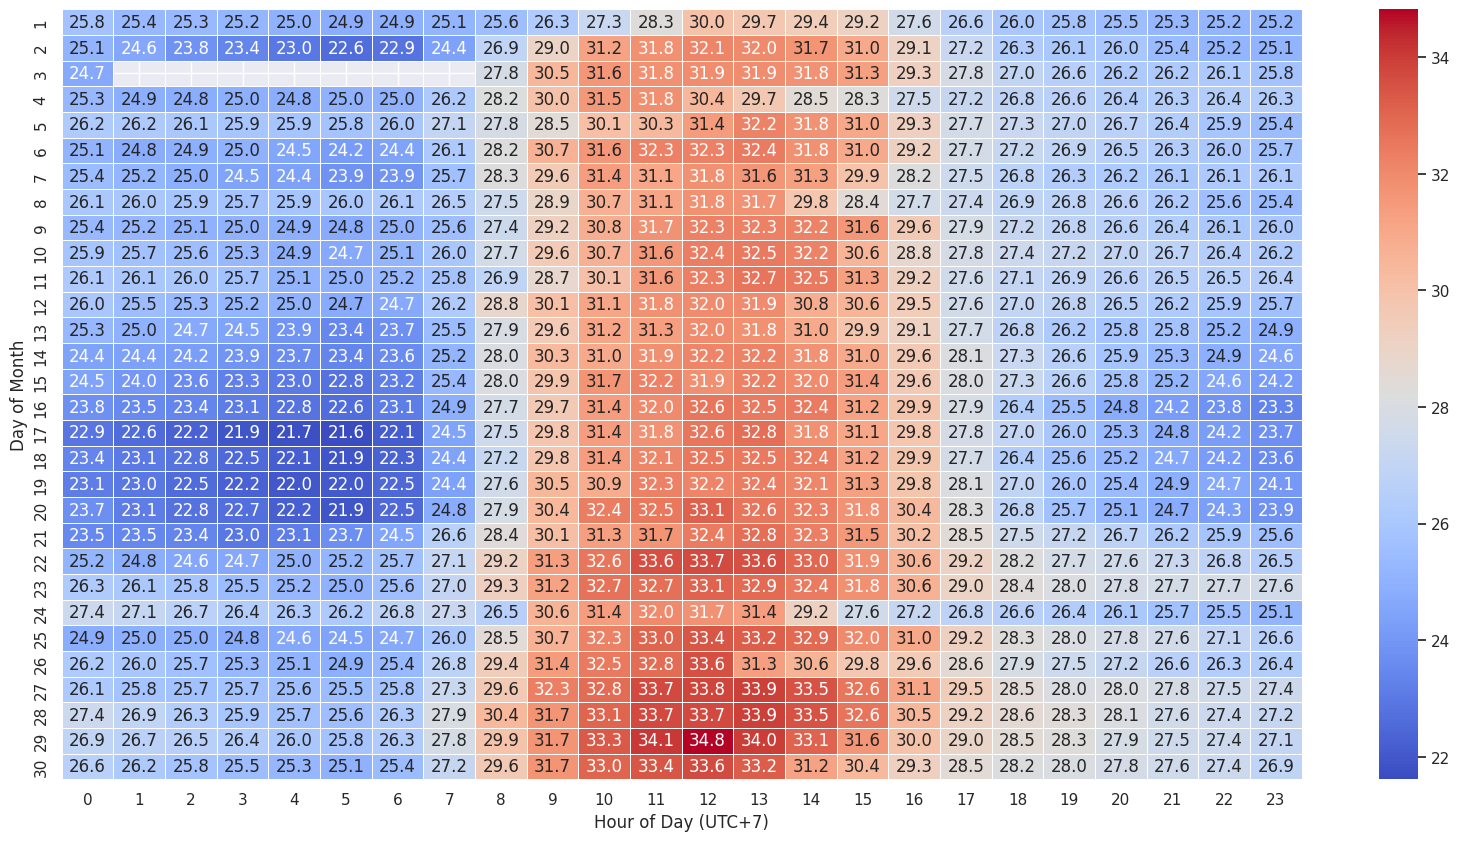

In [12]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == 9)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()


In [13]:
# Mencari 10 nilai suhu terendah beserta tanggalnya
lowest_temperatures = datacuaca.nsmallest(10, 'temperature')[['timestamp', 'temperature']]
# Mencari 10 nilai suhu tertinggi beserta tanggalnya
highest_temperatures = datacuaca.nlargest(10, 'temperature')[['timestamp', 'temperature']]

# Menampilkan hasil
print(lowest_temperatures)
# Menampilkan hasil
print(highest_temperatures)

                 timestamp  temperature
19394  2023-12-26 04:09:50         0.02
342253 2024-08-13 05:52:19        18.92
342256 2024-08-13 05:55:19        18.93
342246 2024-08-13 05:45:19        18.94
342254 2024-08-13 05:53:19        18.94
342255 2024-08-13 05:54:19        18.94
342257 2024-08-13 05:56:19        18.94
342259 2024-08-13 05:58:19        18.94
342248 2024-08-13 05:47:19        18.95
342249 2024-08-13 05:48:19        18.95
               timestamp  temperature
3303 2023-12-14 09:33:07        41.12
3304 2023-12-14 09:34:08        41.11
3305 2023-12-14 09:35:08        41.11
516  2023-12-12 09:39:03        40.98
3302 2023-12-14 09:32:08        40.97
3306 2023-12-14 09:36:08        40.90
515  2023-12-12 09:38:01        40.84
3299 2023-12-14 09:29:08        40.81
3301 2023-12-14 09:31:08        40.79
514  2023-12-12 09:37:01        40.77


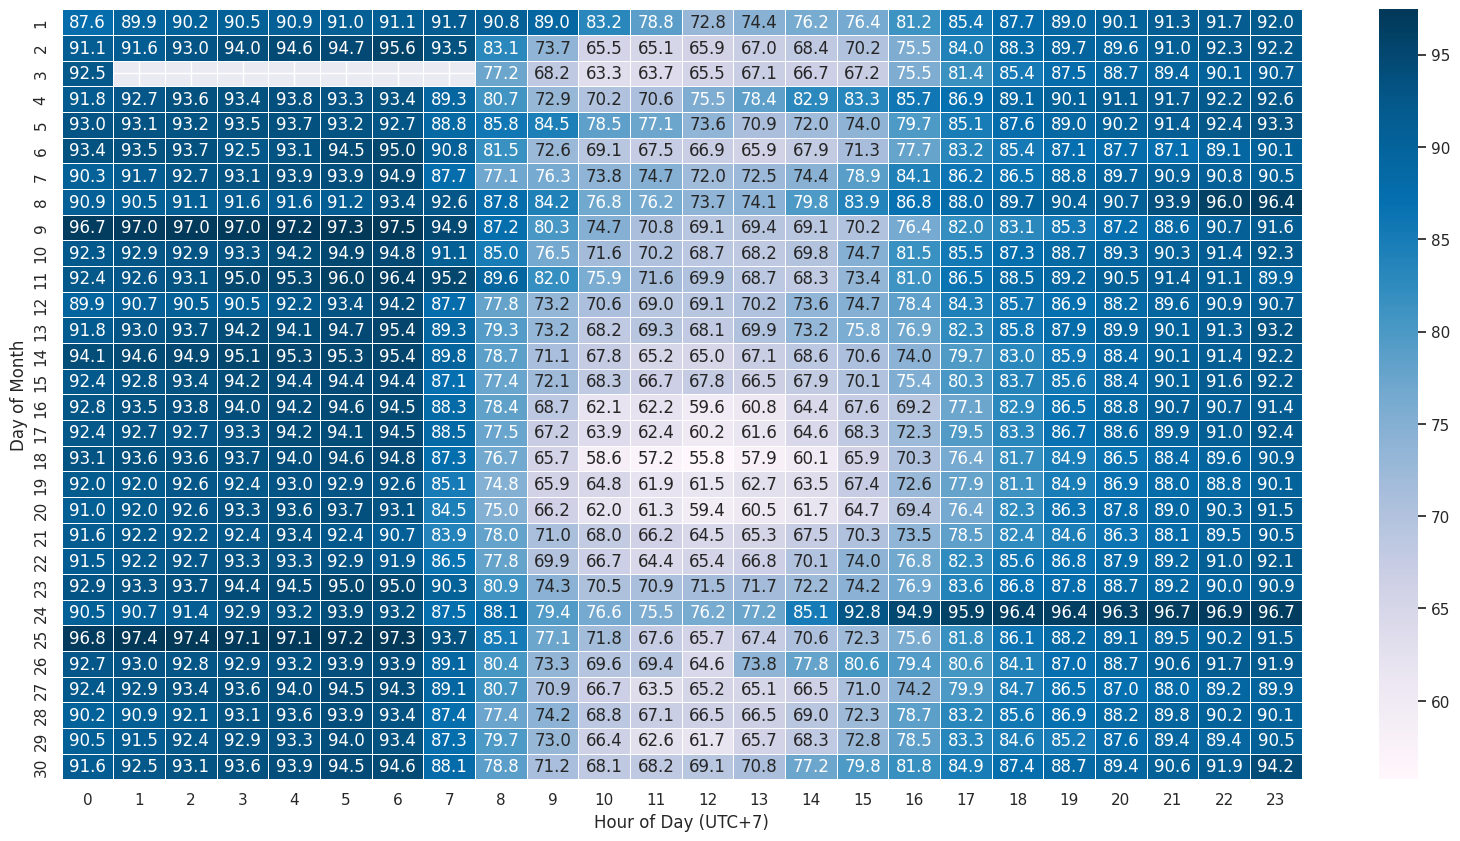

In [16]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == 9)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="PuBu")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>